In [13]:
import nasdaqdatalink as quandl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from common import date_util
from data import investment_universe, sharadar_fundamentals, sharadar_prices
from datetime import date, datetime, timedelta

In [14]:
quandl.ApiConfig.api_key = 'NRvcyMwNMXZ2ooDSM3nw'

In [15]:
dates = []
dollar_volume = []
volume = []
universe_size = []
coverage_size = []
prices_size = []
rebal_date = date(2000, 1, 1)

while rebal_date <= date(2021, 12, 31):
    rebal_date = date_util.get_next_rebal_day(rebal_date, 3)
    dates.append(rebal_date)
    
    universe = investment_universe.get_SPX(rebal_date)
    universe.loc[universe["ticker"] == "PCS1", "name"] = "SPRINT CORP - PCS GROUP"
    # universe = universe.drop_duplicates("name", keep="first")
    universe_size.append(universe.shape[0])

    # fundamentals = sharadar_fundamentals.get_fundamentals(universe['ticker'].to_list(), rebal_date)
    prices = sharadar_prices.get_prices(universe['ticker'].to_list(), rebal_date)
    
    #coverage_size.append(fundamentals.shape[0])
    prices_size.append(prices.shape[0])
    dollar_volume.append(np.sum(prices["volume"] * prices["close"]))
    volume.append(np.sum(prices["volume"]))

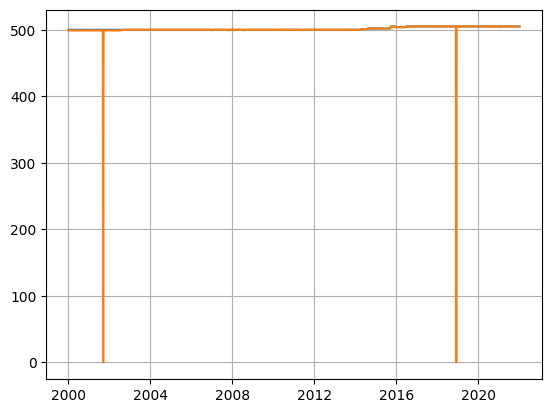

In [16]:
plt.plot(dates, universe_size)
# plt.plot(coverage_size)
plt.plot(dates, prices_size)
plt.grid()

In [17]:
data_df = pd.DataFrame({"date": dates, "universe_size": universe_size, "prices_size": prices_size, "volume": volume})

In [18]:
data_df[data_df["prices_size"] < data_df["universe_size"]]

,date,universe_size,prices_size,volume
0,2000-01-05,500,499,2.904713e+09
1,2000-01-12,500,499,2.689731e+09
2,2000-01-19,500,499,2.291921e+09
3,2000-01-26,500,499,2.263653e+09
4,2000-02-02,500,499,2.084488e+09
...,...,...,...,...
986,2018-11-28,505,504,2.886395e+09
987,2018-12-05,505,0,0.000000e+00
997,2019-02-13,505,504,2.330920e+09
1083,2020-10-07,505,504,2.223010e+09


In [51]:
universe = investment_universe.get_SPX(date(2021, 12, 8))
universe.head()

,Unnamed: 0,date,action,ticker,name,contraticker,contraname,note
0,0,2020-12-31,historical,ZTS,ZOETIS INC,NaN,NaN,NaN
1,1,2020-12-31,historical,ZION,ZIONS BANCORPORATION NATIONAL ASSOCIATION,NaN,NaN,NaN
2,2,2020-12-31,historical,ZBRA,ZEBRA TECHNOLOGIES CORP,NaN,NaN,NaN
3,3,2020-12-31,historical,ZBH,ZIMMER BIOMET HOLDINGS INC,NaN,NaN,NaN
4,4,2020-12-31,historical,YUM,YUM BRANDS INC,NaN,NaN,NaN


In [61]:
prices = sharadar_prices.get_prices(universe['ticker'].to_list(), date(2021, 12, 8), date_util.get_next_rebal_day(date(2021, 12, 8), 3), refresh=True, update=True)

In [62]:
df = pd.merge(left=universe, right=prices, left_on="ticker", right_on="ticker", how="left")
df.head()

,Unnamed: 0,date_x,action,ticker,name,contraticker,contraname,note,date_y,open,...,date_exit,open_exit,high_exit,low_exit,close_exit,volume_exit,closeadj_exit,closeunadj_exit,lastupdated_exit,forward_return
0,0,2020-12-31,historical,ZTS,ZOETIS INC,NaN,NaN,NaN,2021-12-08,227.54,...,2021-12-15,230.27,232.26,227.18,232.08,1841844.0,228.311,232.08,2023-10-31,0.010713
1,1,2020-12-31,historical,ZION,ZIONS BANCORPORATION NATIONAL ASSOCIATION,NaN,NaN,NaN,2021-12-08,64.57,...,2021-12-15,62.43,63.16,61.52,62.76,1381178.0,58.956,62.76,2023-08-17,-0.009476
2,2,2020-12-31,historical,ZBRA,ZEBRA TECHNOLOGIES CORP,NaN,NaN,NaN,2021-12-08,605.44,...,2021-12-15,589.90,599.43,578.90,598.19,171259.0,598.190,598.19,2021-12-15,-0.011893
3,3,2020-12-31,historical,ZBH,ZIMMER BIOMET HOLDINGS INC,NaN,NaN,NaN,2021-12-08,128.48,...,2021-12-15,122.67,123.41,118.27,120.68,3153883.0,115.847,120.68,2023-09-29,-0.064203
4,4,2020-12-31,historical,YUM,YUM BRANDS INC,NaN,NaN,NaN,2021-12-08,132.05,...,2021-12-15,132.01,132.88,131.16,132.42,1226020.0,128.127,132.42,2023-08-29,0.005162


In [63]:
df[df["volume"].isna()]

,Unnamed: 0,date_x,action,ticker,name,contraticker,contraname,note,date_y,open,...,date_exit,open_exit,high_exit,low_exit,close_exit,volume_exit,closeadj_exit,closeunadj_exit,lastupdated_exit,forward_return
225,234,2020-12-31,historical,KSU,KANSAS CITY SOUTHERN,NaN,NaN,NaN,NaT,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


In [19]:
data_df.tail()

,date,universe_size,prices_size,volume
1144,2021-12-08,505,505,2.289717e+09
1145,2021-12-15,505,505,2.762496e+09
1146,2021-12-22,505,505,2.033963e+09
1147,2021-12-29,505,505,1.480711e+09
1148,2022-01-05,505,505,3.038183e+09


In [21]:
np.sum(prices["volume"] * prices["close"])

334964522606.293